## **Produtos mais Impactados pelo Dólar**

#### Este notebook apresenta a correlação entre a cotação do dólar e a inflação dos produtos e compõe o IPC-A, a fim de identificar quais são os produtos mais impactados pela diferença cambial

In [1]:
from DadosAbertosBrasil import ibge, favoritos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Obter cotação do dólar

In [2]:
# Capturar câmbio
dolar = favoritos.cambio(
    moedas = 'USD',
    inicio = '12-01-2014',
    fim = '01-01-2020'
)

dolar.head(10)

,Data,USD
0,2014-12-01 13:13:18.894,2.5624
1,2014-12-02 13:07:39.693,2.5664
2,2014-12-03 13:03:03.283,2.5607
3,2014-12-04 13:05:35.617,2.5797
4,2014-12-05 13:18:44.756,2.5888
5,2014-12-08 13:11:24.541,2.5923
6,2014-12-09 13:10:36.875,2.6016
7,2014-12-10 13:06:25.303,2.5931
8,2014-12-11 13:09:37.296,2.6271
9,2014-12-12 13:05:36.926,2.6558


In [3]:
# Formatar datas
dolar['mês'] = dolar.Data.dt.month
dolar['ano'] = dolar.Data.dt.year
dolar.head(10)

,Data,USD,mês,ano
0,2014-12-01 13:13:18.894,2.5624,12,2014
1,2014-12-02 13:07:39.693,2.5664,12,2014
2,2014-12-03 13:03:03.283,2.5607,12,2014
3,2014-12-04 13:05:35.617,2.5797,12,2014
4,2014-12-05 13:18:44.756,2.5888,12,2014
5,2014-12-08 13:11:24.541,2.5923,12,2014
6,2014-12-09 13:10:36.875,2.6016,12,2014
7,2014-12-10 13:06:25.303,2.5931,12,2014
8,2014-12-11 13:09:37.296,2.6271,12,2014
9,2014-12-12 13:05:36.926,2.6558,12,2014


In [4]:
# Obter última cotação do mês
dolar = dolar.groupby(['ano', 'mês'], as_index=False).last() \
    .drop(columns=['ano', 'mês'])

# Obter variação percentual da cotação
dolar.USD = dolar.USD.pct_change()
dolar.dropna(inplace=True)

dolar.head(10)

,Data,USD
1,2015-01-30 13:03:33.490,0.002297
2,2015-02-27 13:16:10.395,0.081095
3,2015-03-31 13:03:36.780,0.114586
4,2015-04-30 13:09:01.536,-0.066833
5,2015-05-29 13:04:28.682,0.061865
6,2015-06-30 13:02:53.185,-0.023971
7,2015-07-31 13:09:26.023,0.093921
8,2015-08-31 13:10:45.736,0.074455
9,2015-09-30 13:03:13.098,0.089451
10,2015-10-30 13:03:37.247,-0.028694


#### 2. Obter índice IPCA-15 mensal

In [5]:
ibge.lista_tabelas(
    contendo = 'IPCA15',
    index = True
)

,tabela_nome,pesquisa_id,pesquisa_nome
tabela_id,,,
3065,"IPCA15 - Série histórica com número-índice, va...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
1387,"IPCA15 - Variação mensal, acumulada no ano e p...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
1646,"IPCA15 - Variação mensal, acumulada no ano e p...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
7062,"IPCA15 - Variação mensal, acumulada no ano, ac...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15
1705,"IPCA15 - Variação mensal, acumulada no ano, ac...",IQ,Índice Nacional de Preços ao Consumidor Amplo 15


In [6]:
meta = ibge.Metadados(1705)

In [7]:
# Períodos disponíveis
meta.periodos

{'frequencia': 'mensal', 'inicio': 201202, 'fim': 202001}

In [8]:
# Localidades disponíveis
meta.localidades

{'Administrativo': ['N1', 'N6', 'N7'], 'Especial': [], 'IBGE': []}

In [9]:
# Variáveis disponíveis
meta.variaveis

[{'id': 355,
  'nome': 'IPCA15 - Variação mensal',
  'unidade': '%',
  'sumarizacao': []},
 {'id': 356,
  'nome': 'IPCA15 - Variação acumulada no ano',
  'unidade': '%',
  'sumarizacao': []},
 {'id': 1120,
  'nome': 'IPCA15 - Variação acumulada em 12 meses',
  'unidade': '%',
  'sumarizacao': []},
 {'id': 357,
  'nome': 'IPCA15 - Peso mensal',
  'unidade': '%',
  'sumarizacao': []}]

In [10]:
# Aqui precisamos navegar pelo dictionaty de categorias para capturar uma lista de todas as ids
categorias = [cat['id'] for cat in meta.classificacoes[0]['categorias']]

categorias[:10]

[7169, 7170, 7171, 7172, 7173, 7175, 7176, 7177, 12222, 7184]

In [11]:
# Tabela SIDRA
df = ibge.sidra(
    tabela = 1705,
    periodos = '201501-201912',
    variaveis = 355,
    classificacoes = {315: categorias},
    localidades = {1: 'all'}
)

df.sample(10)

,Nível Territorial (Código),Nível Territorial,Mês (Código),Mês,Variável (Código),Variável,Brasil (Código),Brasil,"Geral, grupo, subgrupo, item e subitem (Código)","Geral, grupo, subgrupo, item e subitem",Unidade de Medida (Código),Unidade de Medida,Valor
2122,1,Brasil,201505,maio 2015,355,IPCA15 - Variação mensal,1,Brasil,12412,6101006.Dermatológico,2,%,3.56
17010,1,Brasil,201803,março 2018,355,IPCA15 - Variação mensal,1,Brasil,7276,1106028.Uva,2,%,0.49
22504,1,Brasil,201903,março 2019,355,IPCA15 - Variação mensal,1,Brasil,7479,22.Combustíveis e energia,2,%,0.38
21677,1,Brasil,201901,janeiro 2019,355,IPCA15 - Variação mensal,1,Brasil,7582,4102013.Bermuda e short feminino,2,%,-0.66
9327,1,Brasil,201609,setembro 2016,355,IPCA15 - Variação mensal,1,Brasil,7759,7202041.Cigarro,2,%,-1.55
5658,1,Brasil,201601,janeiro 2016,355,IPCA15 - Variação mensal,1,Brasil,7634,5101010.Passagem aérea,2,%,-5.79
1466,1,Brasil,201504,abril 2015,355,IPCA15 - Variação mensal,1,Brasil,7380,1112025.Pão de queijo,2,%,-0.64
15827,1,Brasil,201712,dezembro 2017,355,IPCA15 - Variação mensal,1,Brasil,12401,3101016.Móvel infantil,2,%,1.28
18120,1,Brasil,201805,maio 2018,355,IPCA15 - Variação mensal,1,Brasil,7606,4201002.Sapato masculino,2,%,0.15
10264,1,Brasil,201612,dezembro 2016,355,IPCA15 - Variação mensal,1,Brasil,7176,1101052.Feijão - preto,2,%,-0.62


In [12]:
series = df.pivot(
    index = 'Mês (Código)',
    columns = 'Geral, grupo, subgrupo, item e subitem',
    values = 'Valor'
).astype(float)

series.head(10)

"Geral, grupo, subgrupo, item e subitem",1.Alimentação e bebidas,11.Alimentação no domicílio,"1101.Cereais, leguminosas e oleaginosas",1101002.Arroz,1101051.Feijão - mulatinho,1101052.Feijão - preto,1101053.Feijão - macassar (fradinho),1101073.Feijão - carioca (rajado),"1102.Farinhas, féculas e massas",1102001.Farinha de arroz,...,9101.Comunicação,9101001.Correio,9101002.Telefone fixo,9101003.Telefone público,9101008.Telefone celular,9101018.Acesso à internet,9101019.Aparelho telefônico,9101021.Telefone com internet - pacote,9101022.TV por assinatura com internet,Índice geral
Mês (Código),,,,,,,,,,,,,,,,,,,,,
201501,1.45,1.73,6.04,1.10,2.70,5.06,8.42,24.25,0.38,0.41,...,-0.04,0.00,0.00,0.81,0.00,0.0,-1.41,0.00,0.00,0.89
201502,0.85,0.77,2.88,0.32,7.02,1.61,5.67,10.07,0.51,2.92,...,0.28,0.00,0.00,0.47,0.90,0.0,-0.65,0.00,0.11,1.33
201503,1.22,1.22,2.28,0.93,9.69,3.04,7.57,4.17,0.82,3.54,...,-0.78,0.00,-2.84,-0.22,0.00,0.0,0.29,0.00,0.00,1.24
201504,1.04,0.93,0.29,-0.45,-0.16,-1.57,3.31,2.37,-0.11,1.97,...,-0.30,0.00,-1.94,0.24,0.00,0.0,0.07,1.18,0.00,1.07
201505,1.05,1.20,-1.45,-0.42,6.39,-3.19,2.17,-4.79,-0.50,0.96,...,0.22,5.86,0.00,1.53,0.30,0.0,0.03,0.34,0.00,0.60
201506,1.21,1.50,-0.63,0.44,-1.28,-0.80,-1.69,-3.15,0.52,-1.35,...,0.08,0.00,0.00,0.32,0.03,0.0,1.29,0.00,0.00,0.99
201507,0.64,0.50,-0.17,-0.06,5.74,-2.17,-6.27,0.69,0.63,0.24,...,0.59,0.00,1.28,0.04,0.83,0.0,-0.59,0.00,0.00,0.59
201508,0.45,0.28,-0.98,-0.46,5.52,-4.30,-4.26,-1.48,1.25,-0.15,...,0.11,0.00,0.07,-0.12,0.00,0.0,-0.54,0.65,0.00,0.43
201509,-0.06,-0.37,-0.87,-0.41,-2.25,1.11,-1.57,-2.48,1.06,0.35,...,0.01,0.00,0.00,0.07,0.08,0.0,-0.28,0.00,0.00,0.39


#### 3. Formatar DataFrame de câmbio para que colunas coincidam

In [13]:
dolar.Data = dolar.Data.dt.strftime('%Y%m')
dolar.set_index('Data', inplace=True)

dolar.head(10)

,USD
Data,
201501,0.002297
201502,0.081095
201503,0.114586
201504,-0.066833
201505,0.061865
201506,-0.023971
201507,0.093921
201508,0.074455
201509,0.089451


#### 4. Correlação

In [14]:
corr = [[col, np.corrcoef(x=dolar.USD, y=series[col])[0,1]] \
    for col in series.columns]

corr = pd.DataFrame(corr, columns=['Itens', 'Correlação'])

corr.sample(10)

,Itens,Correlação
142,1115004.Coco ralado,0.260667
241,3202003.Aparelho de som,0.211721
384,7101014.Depilação,-0.156280
137,1114029.Chá,0.207528
57,1106020.Maracujá,-0.052331
51,1106008.Banana - prata,-0.171786
66,1107009.Fígado,-0.088680
95,1108049.Peixe - castanha,0.037313
383,7101010.Empregado doméstico,-0.180046
261,4102.Roupa feminina,-0.198019


In [15]:
# Maior correlação positiva com dólar
corr.sort_values('Correlação', ascending=False).head(10)

,Itens,Correlação
400,7201054.Boate e danceteria,0.400803
214,3101003.Móvel para quarto,0.325490
145,1115017.Pepino em conserva,0.320569
329,5104005.Gás veicular,0.306430
221,3102007.Utensílios de metal,0.304604
310,5102001.Automóvel novo,0.299042
208,2202.Energia elétrica residencial,0.289758
209,2202003.Energia elétrica residencial,0.289758
203,22.Combustíveis e energia,0.277848
171,1201048.Cerveja,0.272757


In [16]:
# Maior correlação negativa com dólar
corr.sort_values('Correlação', ascending=True).head(10)

,Itens,Correlação
120,1111031.Manteiga,-0.380618
291,4301004.Relógio de pulso,-0.353403
425,8103001.Caderno,-0.333411
305,5101010.Passagem aérea,-0.322829
131,1113040.Margarina,-0.297855
324,5102053.Motocicleta,-0.286491
128,1113.Óleos e gorduras,-0.284880
299,5101.Transporte público,-0.280395
260,4101009.Camisa/camiseta masculina,-0.268817
249,3301009.Conserto de aparelho de som,-0.262327


#### 5. Plottar os dois itens mais correlacionados

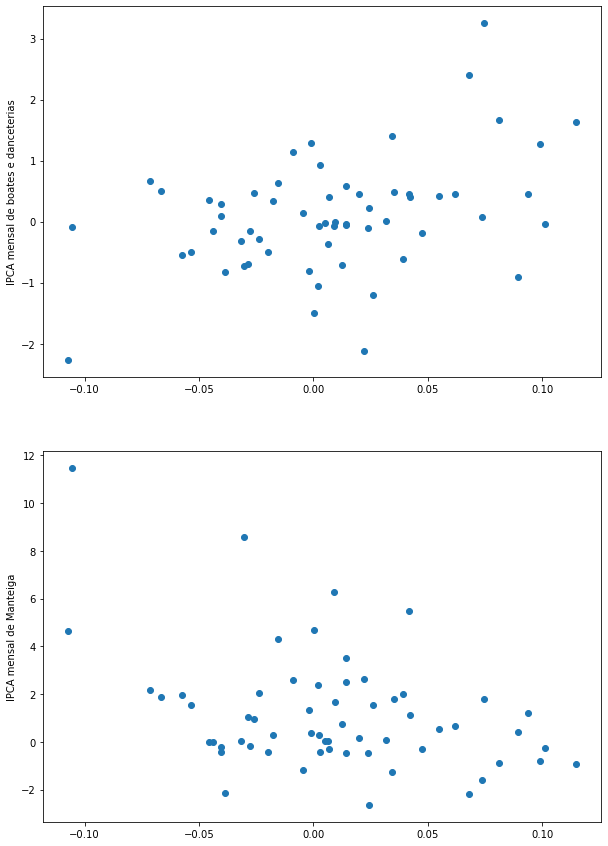

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10,15))

# Boate
ax1 = plt.subplot(211)
plt.scatter(dolar.USD, series['7201054.Boate e danceteria'])
plt.ylabel('IPCA mensal de boates e danceterias')

# Manteiga
ax2 = plt.subplot(212, sharex=ax1)
plt.scatter(dolar.USD, series['1111031.Manteiga'])
plt.ylabel('IPCA mensal de Manteiga')

plt.show()